# Exercise 1

This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

In [1]:
library('ISLR')

## Task (a)
- Produce some numerical and graphical summaries of the Weekly data.
- Do there appear to be any patterns?

In [2]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [3]:
head(Weekly)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


### Quantitative Variables

In [4]:
(numerical_vars = colnames(Weekly)[sapply(Weekly, is.numeric)])

[1] "Year"   "Lag1"   "Lag2"   "Lag3"   "Lag4"   "Lag5"   "Volume" "Today"

In [5]:
cor(Weekly[numerical_vars])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


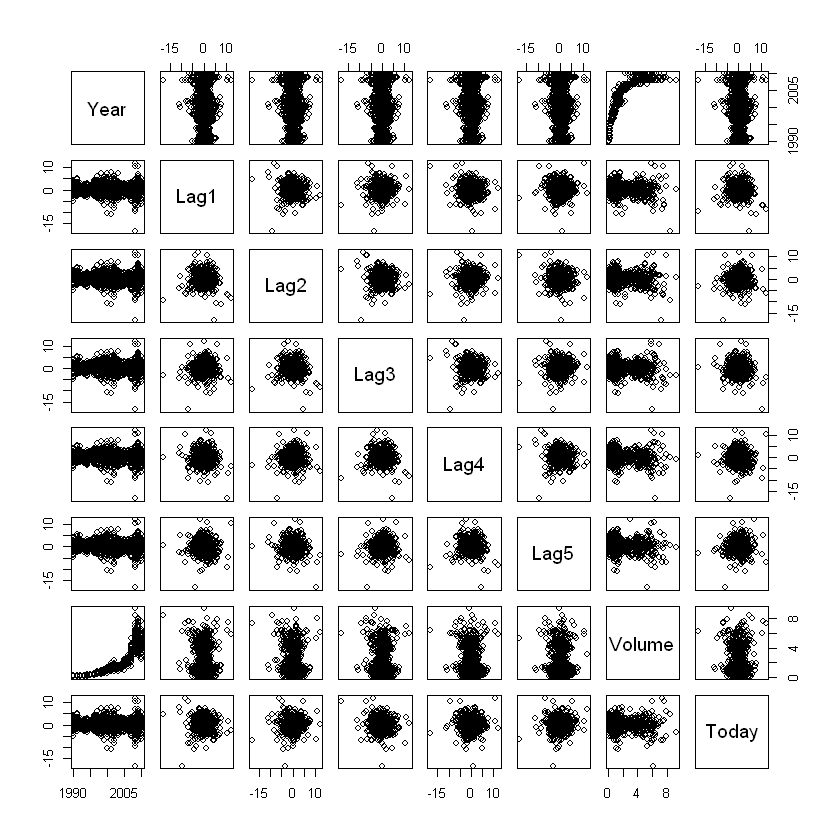

In [6]:
pairs(Weekly[numerical_vars])

**Comment**

The correlations between the Lag variables and Today's returns are approximately close to zero. The only significant correlation is between Year and Volume. When plotting Volume together with Year, it can be clearly seen to increase over the time.

### Qualitative Variables

In [7]:
(categorical_vars = colnames(Weekly)[sapply(Weekly, is.factor)])

[1] "Direction"

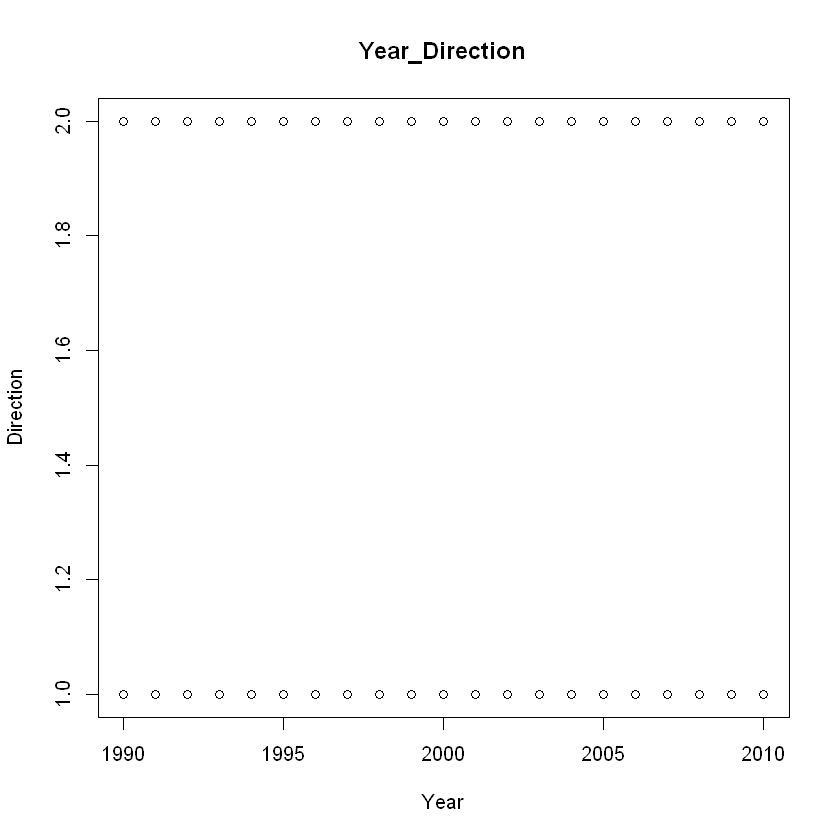

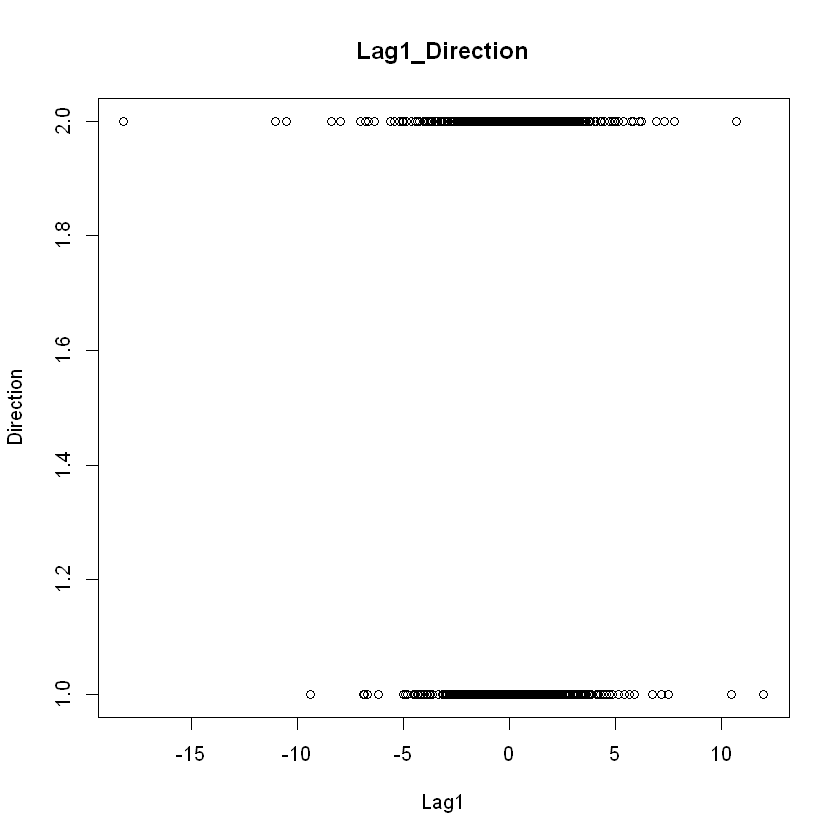

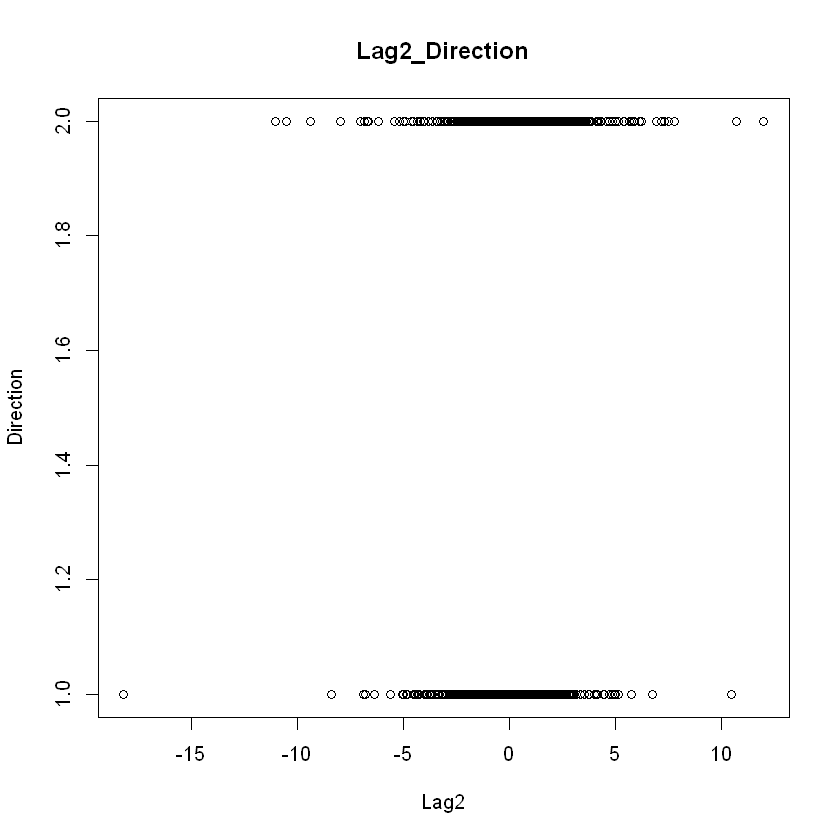

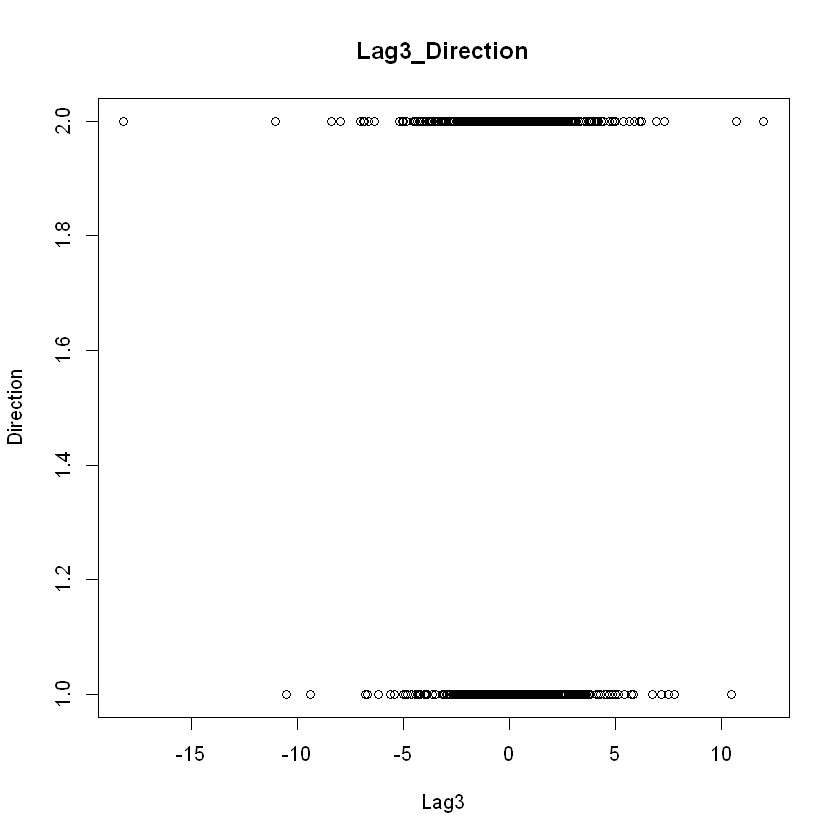

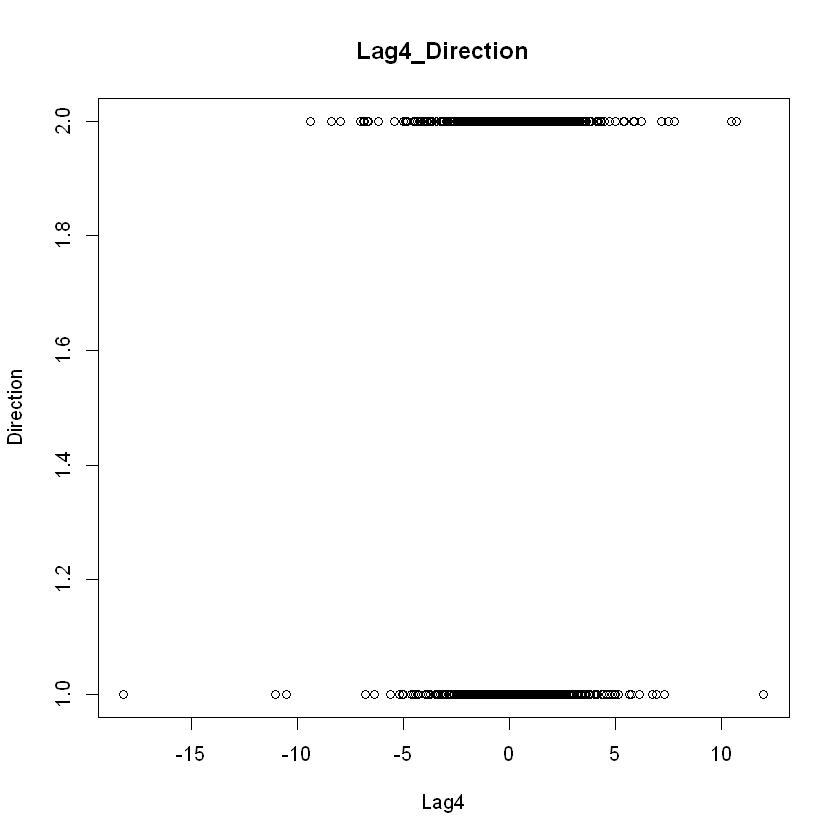

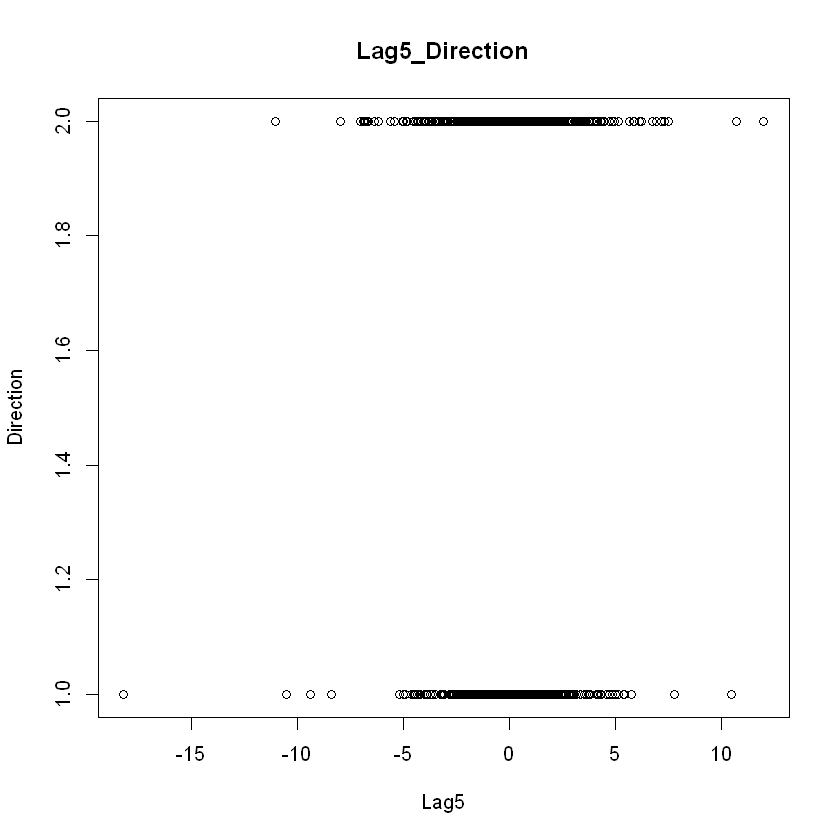

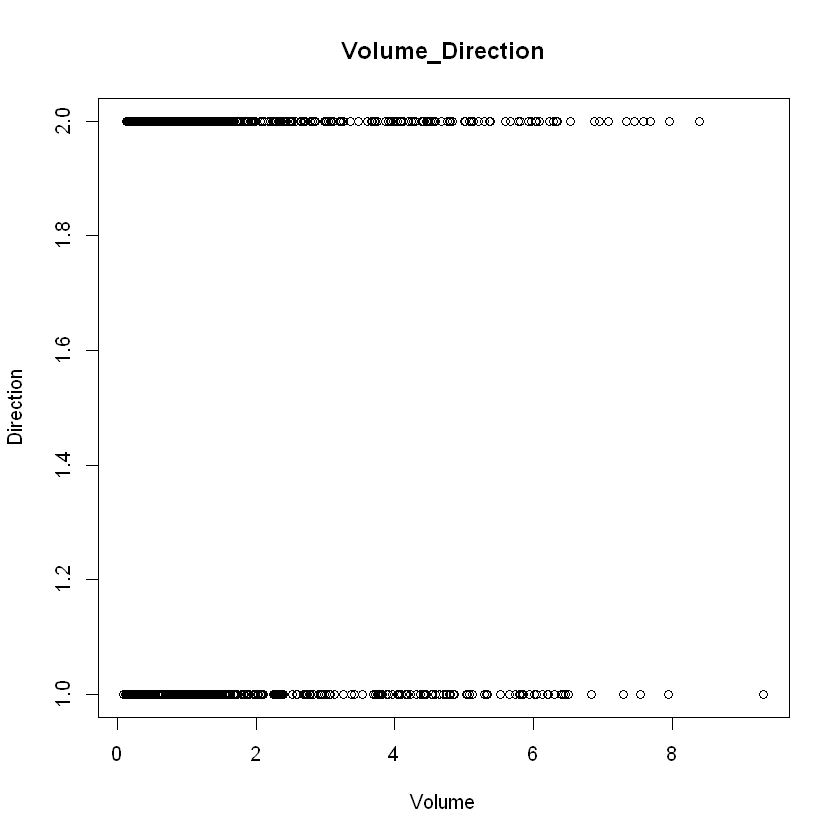

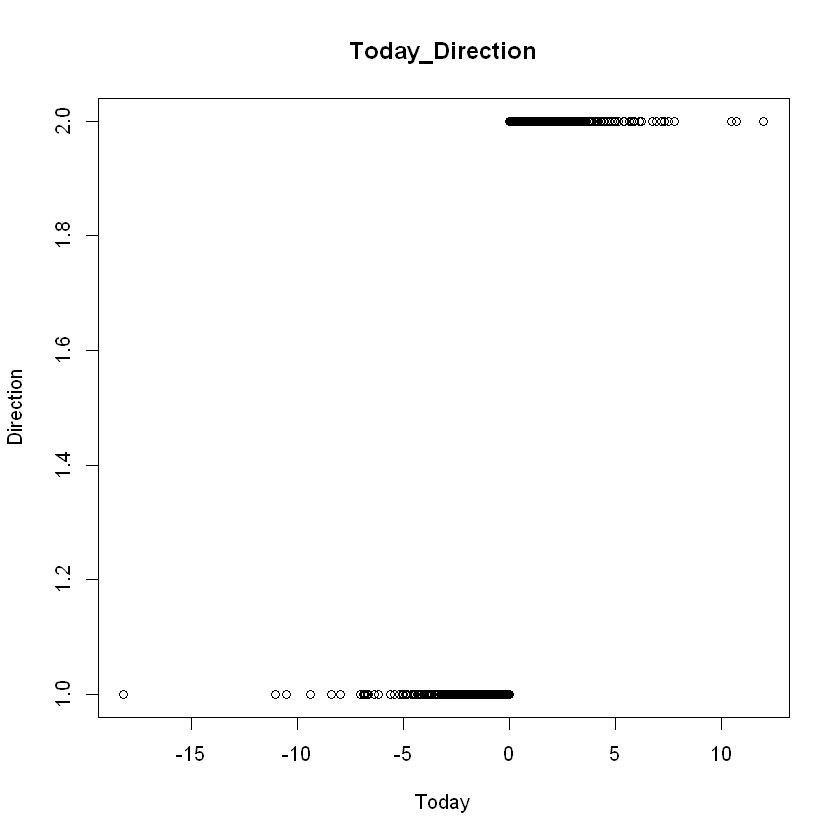

In [8]:
for (colname in numerical_vars) {
    plot(
        Weekly[[colname]], Weekly[['Direction']], 
        main=paste(colname, 'Direction', sep='_'),
        xlab=colname, ylab='Direction'
    )

}

**Comment**

Direction is actually the sign of Today's returns. It can be seen from the plots that there is no relationship between Direction and the rest except Today's returns (which was expected).

## Task (b) 
- Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors.
- Use the summary function to print the results.
- Does any of the predictors appear to be statistically significant? If so, which ones?

In [9]:
attach(Weekly)

In [10]:
# Fit logistic regression model on Weekly:
fit.glm = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)
summary(fit.glm)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


**Comment:**

It seems that Lag2 is the only predictor which is statistically significant as its p-value is less than 0.05

## Task (c)
- Compute the confusion matrix and overall fraction of correct predictions. 
- Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [11]:
probs = predict(fit.glm, type = "response")
pred.glm = rep("Down", length(probs))
pred.glm[probs > 0.5] = "Up"
table(pred.glm, Direction)

        Direction
pred.glm Down  Up
    Down   54  48
    Up    430 557

**Comment:**

Percentage of correct predictions on the training data is (54+557)/1089 = 56.1065197%. In other words 43.8934803% is the training error rate.
- When the market goes up, the model is right 92.0661157% of the time (557/(48+557))
- When the market goes down, the model is right only 11.1570248% of the time (54/(54+430))

## Task (d) 
- Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. 
- Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [12]:
# Train/test split:
train = (Year < 2009)
test = Weekly[-train, ]
y_test = Direction[-train]

In [13]:
# Fit logistic regression model on train:
fit.glm2 = glm(Direction ~ Lag2, data = Weekly, family = binomial, subset = train)
summary(fit.glm2)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


In [14]:
# Get test result:
probs2 = predict(fit.glm2, test, type = "response")
pred.glm2 = rep("Down", length(probs2))
pred.glm2[probs2 > 0.5] = "Up"
table(pred.glm2, y_test)

         y_test
pred.glm2 Down  Up
     Down   32  25
     Up    451 580

**Comment:**

Percentage of correct predictions on the test data is (9+56)/104 wich is equal to 62.5%. In other words 37.5% is the test error rate. 
- When the market goes up, the model is right 91.8032787% of the time (56/(56+5)). 
- When the market goes down, the model is right only 20.9302326% of the time (9/(9+34)).

## Task (e) 
- Repeat (d) using LDA

In [15]:
library(MASS)

In [16]:
(fit.lda = lda(Direction ~ Lag2, data = Weekly, subset = train))

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

In [17]:
pred.lda = predict(fit.lda, test)
table(pred.lda[['class']], y_test)

      y_test
       Down  Up
  Down   31  25
  Up    452 580

**Comment:**

Percentage of correct predictions on the test data is 62.5%. In other words 37.5% is the test error rate.
- When the market goes up, the model is right 91.8032787% of the time.
- When the market goes down, the model is right only 20.9302326% of the time.

## Task (f) 
- Repeat (d) using QDA.

In [18]:
(fit.qda = qda(Direction ~ Lag2, data = Weekly, subset = train))

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [19]:
pred.qda = predict(fit.qda, test)
table(pred.qda[['class']], y_test)

      y_test
       Down  Up
  Down    0   0
  Up    483 605

**Comment:**

Percentage of correct predictions on the test data is 58.6538462%. In other words 41.3461538% is the test error rate. 
- When the market goes up, the model is right 100% of the time
- When the market goes down, the model is right only 0% of the time.

This model achieves a correctness of 58.6538462% even though the model always predict the direction as Up

# Exercise 2

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the “Auto” data set.

In [20]:
detach(Weekly)
attach(Auto)

## Task (a)
Create a binary variable, “mpg01”, that contains a 1 if “mpg” contains a value above its median, and a 0 if “mpg” contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both “mpg01” and the other “Auto” variables.

In [21]:
# Create mpg01:
mpg01 = rep(0, length(mpg))
mpg01[mpg > median(mpg)] = 1

# Concat mpg01 with Auto:
Auto = data.frame(Auto, mpg01)
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


## Task (b)
- Explore the data graphically in order to investigate the association between “mpg01” and the other features.
- Which of the other features seem most likely to be useful in predictiong “mpg01” ? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

In [22]:
# Calculate correlation of every variables except 9th one (name):
cor(Auto[, -9]) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


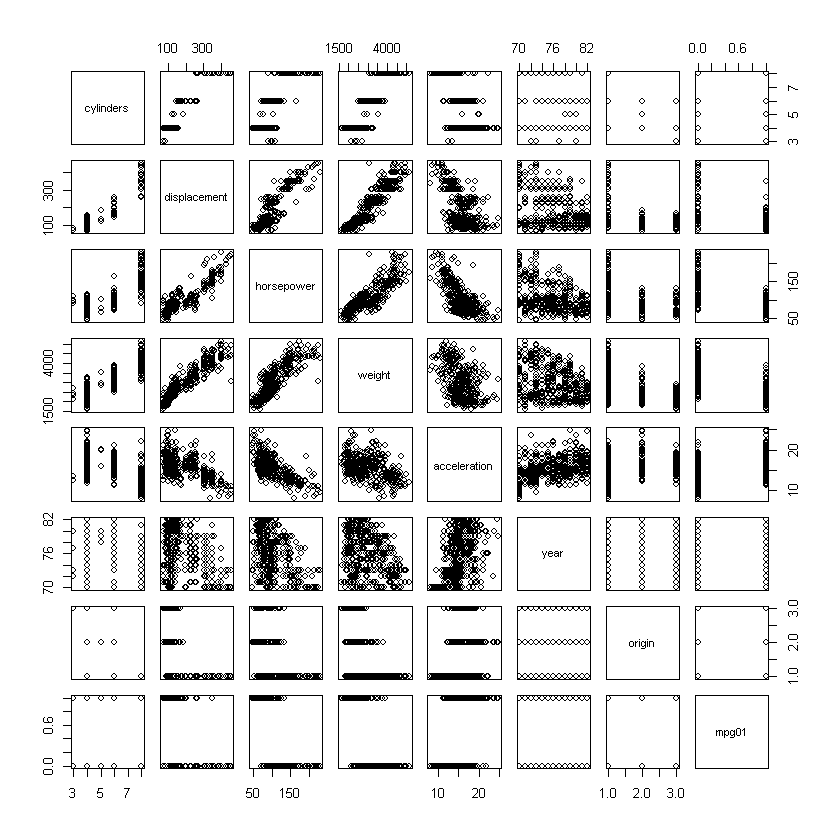

In [23]:
plot(Auto[, -c(1, 9)])

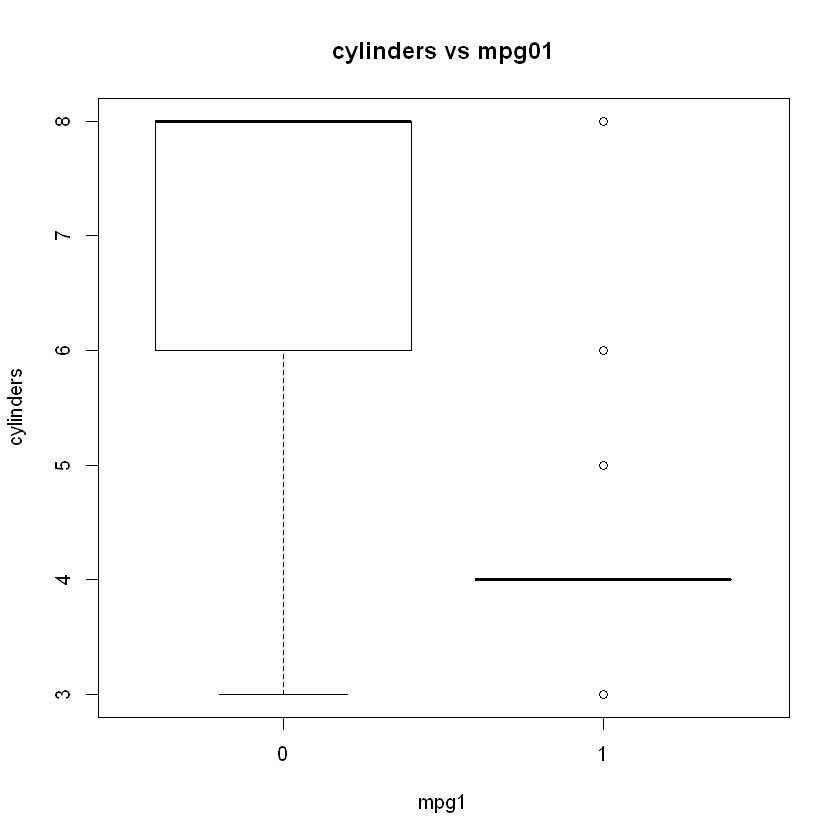

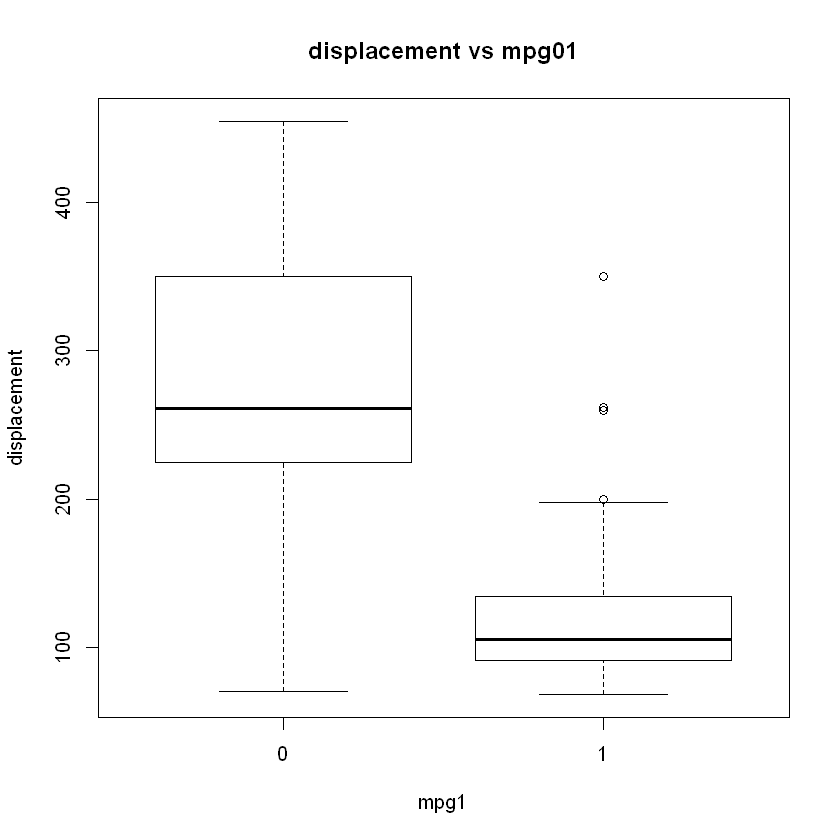

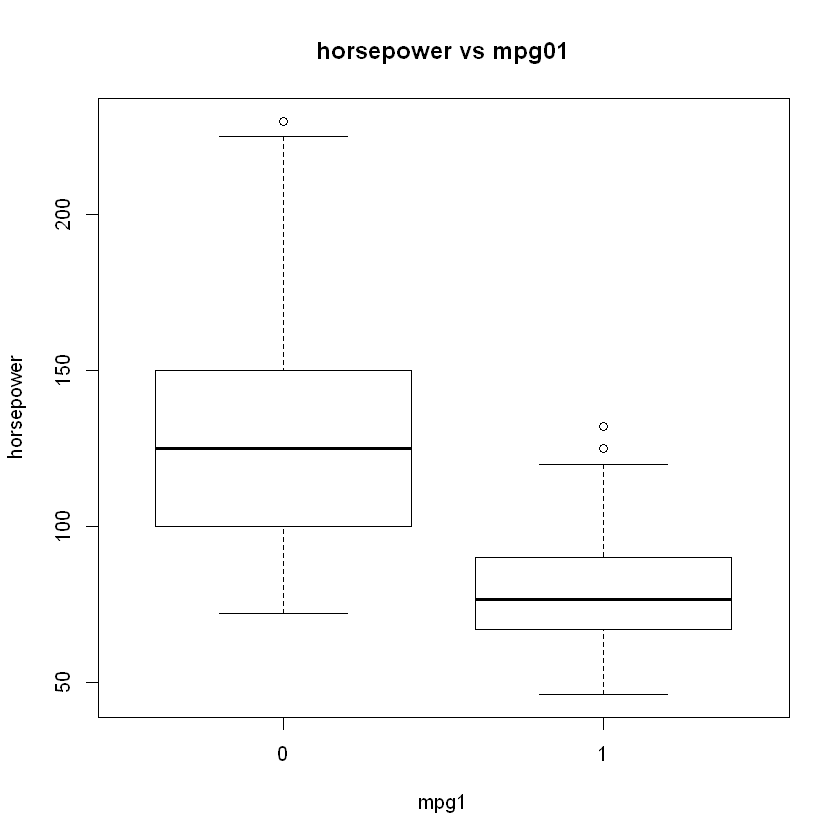

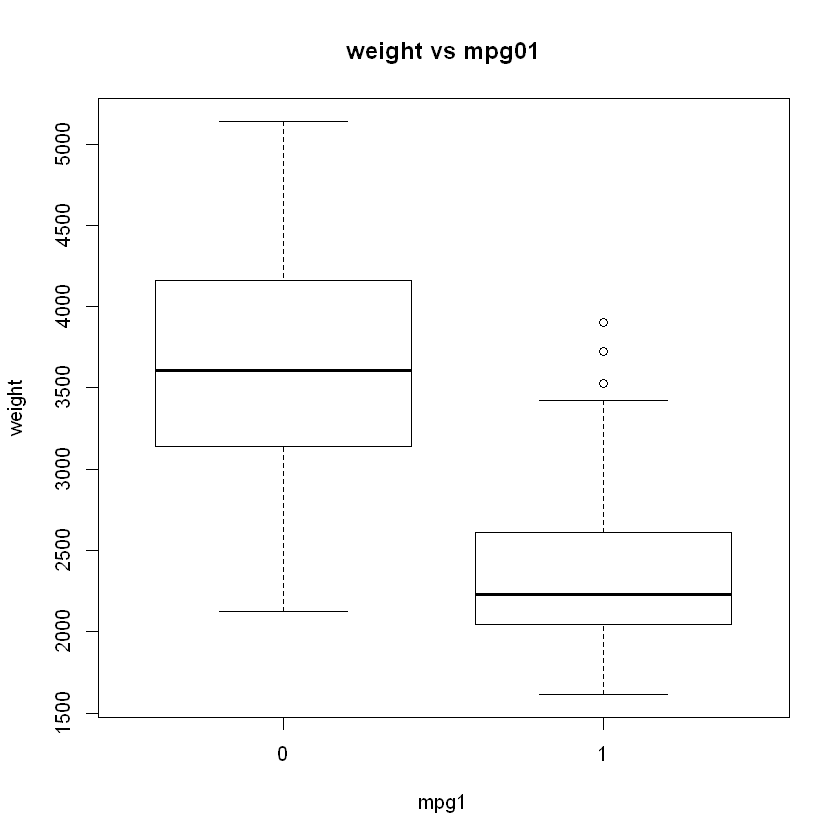

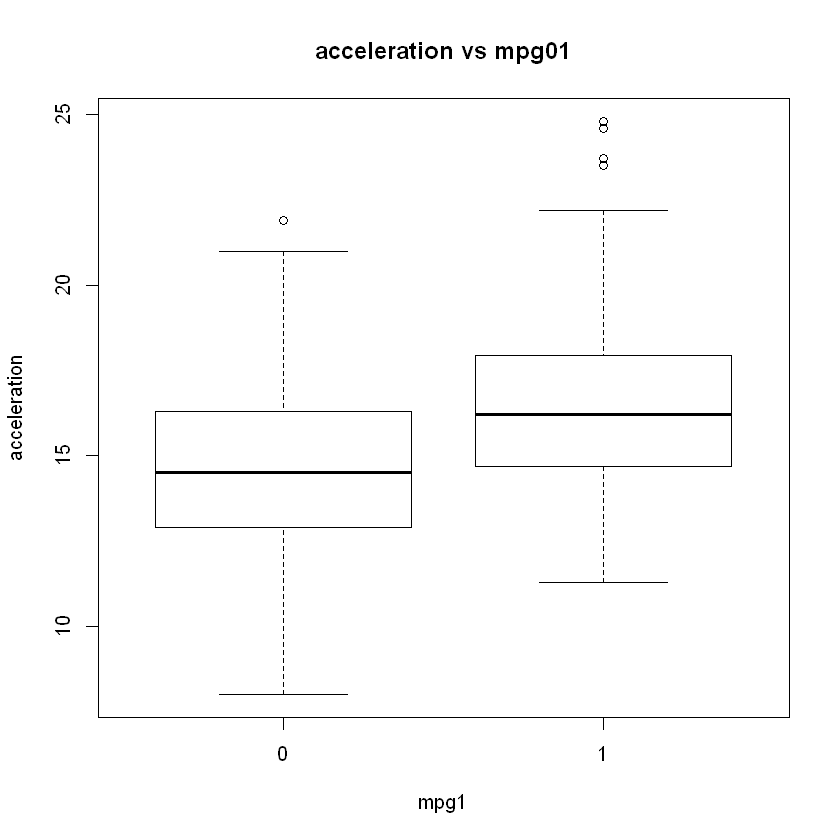

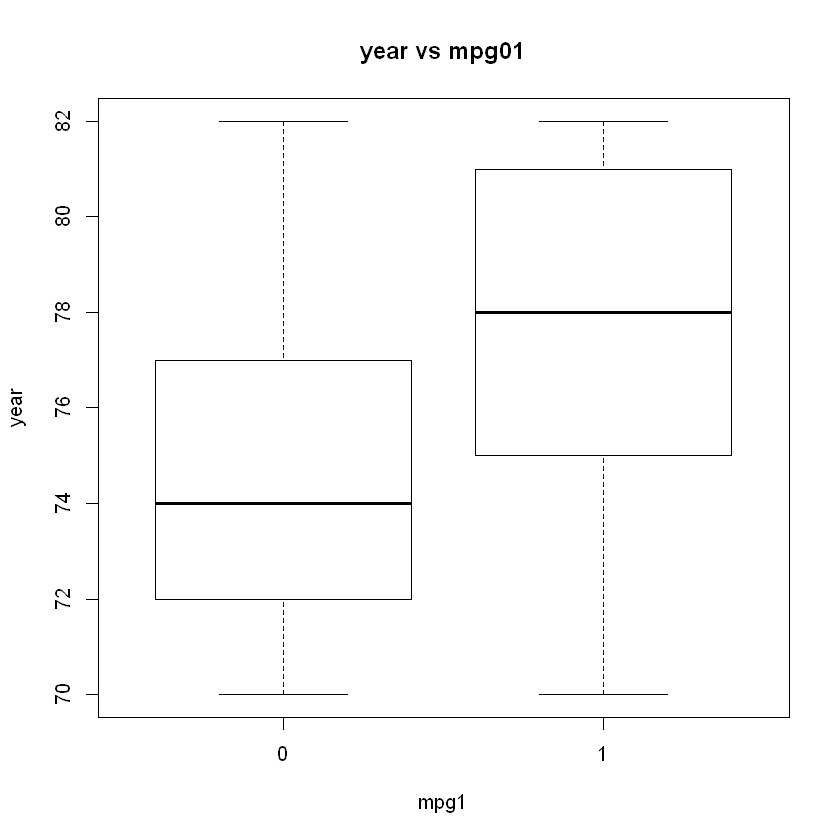

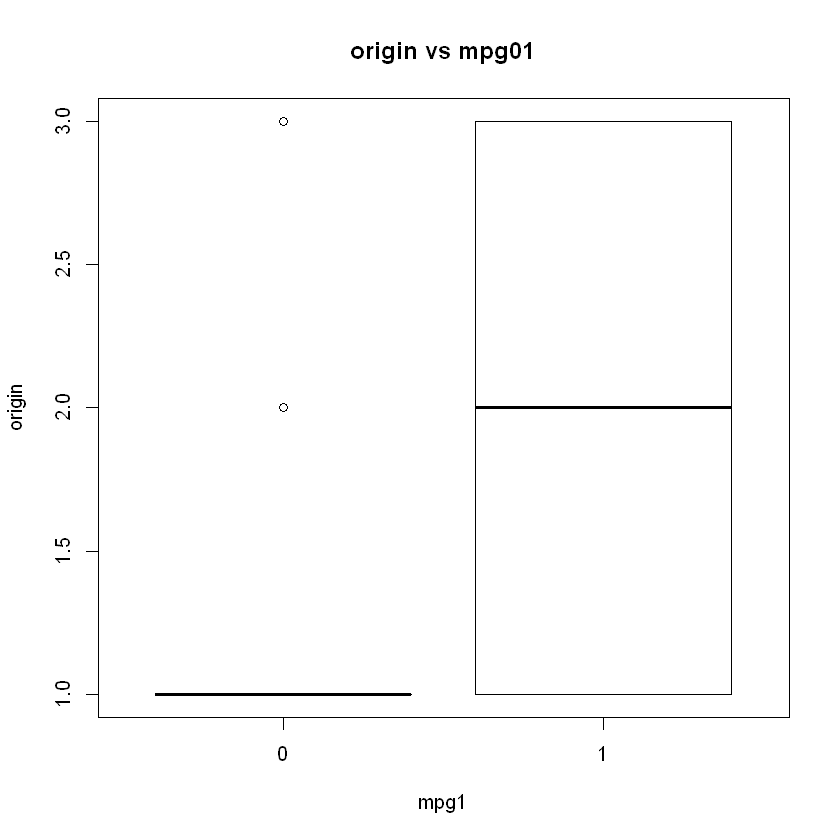

In [24]:
for (var in names(Auto[, -c(1, 9, 10)])) {
    boxplot(Auto[[var]] ~ mpg01, data = Auto, main = paste(var,"vs mpg01"), xlab="mpg1", ylab=var)
}

**Comment:**

There might be some association between mpg01 and cylinders, weight, displacement and horsepower

## Task (c)
Split the data into a training set and a test set.

In [25]:
set.seed(1)
train = sample(392, 196)
Auto.train = Auto[train, ]
Auto.test = Auto[-train, ]
mpg01.test = mpg01[-train]

print(dim(Auto.train))
print(dim(Auto.test))

[1] 196  10
[1] 196  10


## Task (d)
Perform LDA on the training data in order to predict “mpg01” using the variables that seemed most associated with “mpg01” in (b). What is the test error of the model obtained ?

In [26]:
(fit.lda = lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, subset = train))

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.4795918 0.5204082 

Group means:
  cylinders   weight displacement horsepower
0  6.872340 3620.723     276.8404  129.40426
1  4.137255 2319.118     113.6275   77.92157

Coefficients of linear discriminants:
                       LD1
cylinders    -0.4495275445
weight       -0.0005339524
displacement -0.0080629902
horsepower    0.0100691240

In [27]:
pred.lda = predict(fit.lda, Auto.test)
table(pred.lda[['class']], mpg01.test)

   mpg01.test
     0  1
  0 83  6
  1 19 88

In [28]:
mean(pred.lda[['class']] != mpg01.test)

[1] 0.127551

**Comment:**

Test error rate LDA model: 12.7551020408163%

## Task (e)
Perform QDA on the training data in order to predict “mpg01” using the variables that seemed most associated with “mpg01” in (b). What is the test error of the model obtained ?

In [29]:
(fit.qda = qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, subset = train))

Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.4795918 0.5204082 

Group means:
  cylinders   weight displacement horsepower
0  6.872340 3620.723     276.8404  129.40426
1  4.137255 2319.118     113.6275   77.92157

In [30]:
pred.qda = predict(fit.qda, Auto.test)
table(pred.qda[['class']] , mpg01.test)

   mpg01.test
     0  1
  0 89 10
  1 13 84

In [31]:
mean(pred.qda[['class']] != mpg01.test)

[1] 0.1173469

**Comment:**

Test error rate of QDA model: 11.734693877551%

## Task (f)
Perform logistic regression on the training data in order to predict “mpg01” using the variables that seemed most associated with “mpg01” in (b). What is the test error of the model obtained ?

In [32]:
fit.glm = glm(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, family = binomial, subset = train)
summary(fit.glm)


Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower, 
    family = binomial, data = Auto, subset = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5768  -0.1043   0.1291   0.3476   2.2602  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  11.3034129  2.6683207   4.236 2.27e-05 ***
cylinders    -0.0517713  0.5239294  -0.099   0.9213    
weight       -0.0013873  0.0009885  -1.403   0.1605    
displacement -0.0194725  0.0124725  -1.561   0.1185    
horsepower   -0.0395012  0.0224692  -1.758   0.0787 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 271.387  on 195  degrees of freedom
Residual deviance:  94.438  on 191  degrees of freedom
AIC: 104.44

Number of Fisher Scoring iterations: 7


In [33]:
probs = predict(fit.glm, Auto.test, type = "response")
pred.glm = rep(0, length(probs))
pred.glm[probs > 0.5] = 1
table(pred.glm, mpg01.test)

        mpg01.test
pred.glm  0  1
       0 86  8
       1 16 86

In [34]:
mean(pred.glm != mpg01.test)

[1] 0.122449

**Comment:**

Test error rate of Logistic Regression model: 12.2448979591837%